In [1]:
########################################
#Precision & Recall change scatterplots#
#Maintainer: Christopher Chan          #
#Version: 0.0.1                        #
#Date: 2022-08-04                      #
########################################

import os, sys, re
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
%matplotlib inline

depth_wise = pd.read_excel(os.path.join(os.getcwd(), "Precision_Recall_change.ods"), sheet_name = "Depth-wise")
data_wise = pd.read_excel(os.path.join(os.getcwd(), "Precision_Recall_change.ods"), sheet_name = "Dataset-wise")
weight_wise = pd.read_excel(os.path.join(os.getcwd(), "Precision_Recall_change.ods"), sheet_name = "Weights-wise")

In [2]:
depth_wise

,Architecture,Input dataset,Precision change,Recall change
0,4 to 5 layer U-Net (NoIMN),KBY,0.011,-0.003
1,4 to 5 layer U-Net (NoIMN),KBY + DZK + DZKN,0.007,-0.002
2,EfficientNet B1 to B2 U-Net (NoIMN),KBY,-0.003,-0.012
3,EfficientNet B1 to B2 U-Net (IMN),KBY,0.003,-0.006
4,EfficientNet B1 to B2 U-Net (NoIMN),KBY + DZK + DZKN,0.023,0.006
5,EfficientNet B1 to B2 U-Net (IMN),KBY + DZK + DZKN,-0.006,-0.002


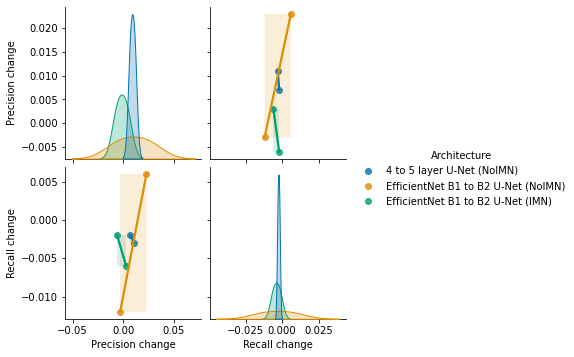

In [9]:
# Depth-wise change regplot
depth_PS = sns.pairplot(depth_wise, 
                        x_vars = ["Precision change", "Recall change"], y_vars = ["Precision change", "Recall change"],
                        hue = "Architecture", kind = "reg", palette = "colorblind")

In [4]:
data_wise

,Input dataset,Architecture,Initialised weights,Precision change,Recall change
0,KBY to ALL,4-layer U-Net,None,-0.065,-0.016
1,KBY to ALL,5-layer U-Net,None,-0.070,-0.153
2,KBY to ALL,EfficientNet B1 U-Net,None,-0.124,-0.044
3,KBY to ALL,EfficientNet B1 U-Net,ImageNet,-0.119,-0.032
4,KBY to ALL,EfficientNet B1 U-Net (OCC),OCC,-0.002,-0.387
5,KBY to ALL,EfficientNet B1 U-Net (OCC),OCCtransfer-trained,-0.125,-0.043
6,KBY to ALL,EfficientNet B2 U-Net,None,-0.099,-0.026
7,KBY to ALL,EfficientNet B2 U-Net,ImageNet,-0.128,-0.028


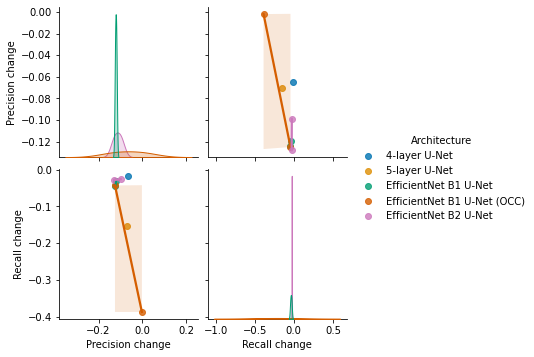

In [5]:
# Dataset-wise change regplot
data_PS = sns.pairplot(data_wise, 
                        x_vars = ["Precision change", "Recall change"], y_vars = ["Precision change", "Recall change"],
                        hue = "Architecture", kind = "reg", palette = "colorblind")

In [6]:
weight_wise

,Architecture,Weights change,Input dataset,Precision change,Recall change
0,EfficientNet B1 U-Net,None to ImageNet,KBY,0.003,0.0080
1,EfficientNet B1 U-Net,None to ImageNet,KBY + DZK + DZKN,0.009,0.0197
2,EfficientNet B2 U-Net,None to ImageNet,KBY,0.009,0.0140
3,EfficientNet B2 U-Net,None to ImageNet,KBY + DZK + DZKN,-0.020,0.0120


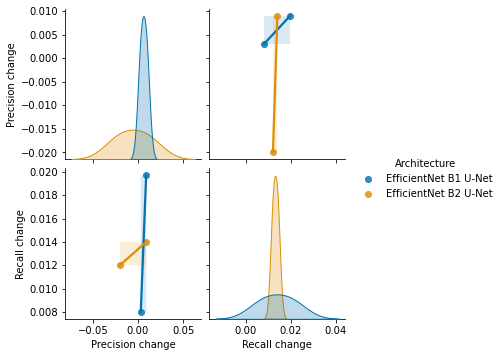

In [7]:
# Dataset-wise change regplot
weight_PS = sns.pairplot(weight_wise, 
                         x_vars = ["Precision change", "Recall change"], y_vars = ["Precision change", "Recall change"],
                         hue = "Architecture", kind = "reg", palette = "colorblind")